In [ ]:
pip list

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/Final_Project

/content/drive/MyDrive/Final_Project


In [3]:
import matplotlib.pyplot as plt
import platform

plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False) 
%config InlineBackend.figure_format='retina' 


In [4]:
import pandas as pd


df3 = pd.read_csv("/content/drive/MyDrive/Final_Project/공공자전거 이용정보(시간대별)_21.03.csv")
df4 = pd.read_csv("/content/drive/MyDrive/Final_Project/공공자전거 이용정보(시간대별)_21.04.csv")
df5 = pd.read_csv("/content/drive/MyDrive/Final_Project/공공자전거 이용정보(시간대별)_21.05.csv")


In [5]:
df4.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2021-04-01,0,956,956. 응암시장교차로,정기권,NaN,~10대,1,103.55,1.24,5336.47,34
1,2021-04-01,0,3426,3426.독립문역 2번출구 뒤,정기권,NaN,~10대,1,66.70,0.65,2807.33,17
2,2021-04-01,0,1074,1074.대명초교입구 사거리,정기권,NaN,~10대,1,20.31,0.21,900.00,5
3,2021-04-01,0,2524,2524.반포쇼핑타운 8동 앞,정기권,NaN,~10대,1,0.00,0.00,0.00,4
4,2021-04-01,0,2817,2817.천왕이펜하우스5단지 앞,정기권,NaN,~10대,1,16.75,0.13,542.30,3


In [6]:
df5.tail()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
1048570,2021-05-14,13,2658,2658.가락몰 업무동,정기권,NaN,30대,1,50.01,0.45,1942.90,18
1048571,2021-05-14,13,525,525. 한양대병원사거리,정기권,NaN,30대,1,39.11,0.46,1975.00,14
1048572,2021-05-14,13,3904,3904. 테크노마트 앞,정기권,NaN,30대,1,15.27,0.12,514.02,5
1048573,2021-05-14,13,3602,3602. 한국지역난방공사강남지사,정기권,NaN,30대,1,119.91,1.33,5713.46,36
1048574,2021-05-14,13,3753,3753. 공항중학교 버스정류장,정기권,NaN,30대,2,88.69,0.73,3155.14,16


In [7]:
df = pd.concat([df3,df4,df5])

In [8]:
df.shape

(3145725, 12)

In [9]:
df.dropna(how='any', inplace=True)

In [10]:
df.dtypes

대여일자       object
대여시간        int64
대여소번호       int64
대여소명       object
대여구분코드     object
성별         object
연령대코드      object
이용건수        int64
운동량        object
탄소량        object
이동거리      float64
사용시간      float64
dtype: object

In [11]:
df['연령대코드'].value_counts()

20대     656616
30대     481516
40대     305697
50대     186190
~10대     88563
60대      53717
70대~      8946
Name: 연령대코드, dtype: int64

In [12]:
df.drop(df[df['대여구분코드']=='단기권(전기)'].index, inplace=True)
df.drop(df[df['대여구분코드']=='일일권(비회원)'].index, inplace=True)

<function matplotlib.pyplot.show>

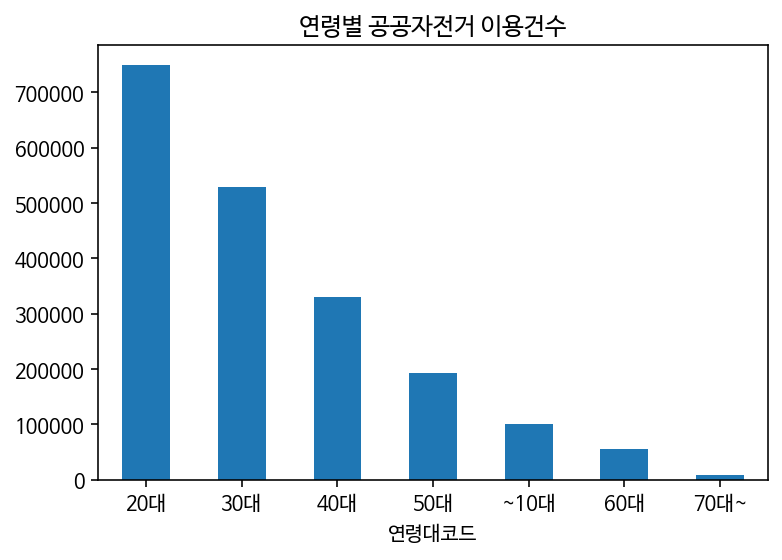

In [13]:
'''!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf'''

age = df.groupby('연령대코드')['이용건수'].sum().sort_values(ascending=False)
age.plot(kind='bar', title="연령별 공공자전거 이용건수", rot=0)

plt.show

In [14]:
df_GU = pd.read_csv("/content/drive/MyDrive/Final_Project/서울특별시 코로나19 자치구별 확진자 발생동향.csv", encoding='cp949')

In [15]:
df_SEOUL = pd.read_csv("/content/drive/MyDrive/Final_Project/서울특별시 코로나19 확진자 발생동향(3-5월).csv")

In [16]:
df_SEOUL.tail()

,서울시 기준일,서울시 확진자,서울시 추가 확진,서울시 치료중,서울시 퇴원,서울시 추가 퇴원,서울시 사망,서울시 의심환자 전체,서울시 의심환자 검사중,서울시 의심환자 검사결과(음성),전국 기준일,전국 확진,전국 추가 확진,전국 치료중,전국 퇴원,전국 사망,전국 의심환자 전체,전국 의심환자 검사중,전국 의심환자 검사결과(음성),자가격리자 해외입국자 감시중,자가격리자 해외입국자 감시해제,자가격리자 접촉자 감시중,자가격리자 접촉자 감시해제,확인중 확진자
88,2021.03.05,28820,129,2883,25546,127,391,NaN,NaN,NaN,2021.03.05.00,91638,398,7451,82560,1627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
89,2021.03.04,28691,118,2884,25419,168,388,NaN,NaN,NaN,2021.03.04.00,91240,424,7459,82162,1619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
90,2021.03.03,28573,119,2937,25251,99,385,NaN,NaN,NaN,2021.03.03.00,90816,444,7504,81700,1612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
91,2021.03.02,28454,122,2921,25152,65,381,NaN,NaN,NaN,2021.03.02.00,90372,344,7428,81338,1606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
92,2021.03.01,28332,92,2864,25087,70,381,NaN,NaN,NaN,2021.03.01.00,90029,355,7354,81070,1605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
df_GU.head()

In [17]:
covid = pd.read_csv('/content/drive/MyDrive/Final_Project/서울특별시 코로나19 확진자 발생동향(3-5월)_2.csv')
covid = covid[['서울시 기준일','서울시 확진자','서울시 추가 확진']]

covid.tail()

,서울시 기준일,서울시 확진자,서울시 추가 확진
44,2021-03-05,28820,129
45,2021-03-04,28691,118
46,2021-03-03,28573,119
47,2021-03-02,28454,122
48,2021-03-01,28332,92


In [18]:
covid['날짜'] = pd.to_datetime(covid['서울시 기준일'])

covid.tail()

,서울시 기준일,서울시 확진자,서울시 추가 확진,날짜
44,2021-03-05,28820,129,2021-03-05
45,2021-03-04,28691,118,2021-03-04
46,2021-03-03,28573,119,2021-03-03
47,2021-03-02,28454,122,2021-03-02
48,2021-03-01,28332,92,2021-03-01


In [19]:
covid.dtypes

서울시 기준일              object
서울시 확진자               int64
서울시 추가 확진             int64
날짜           datetime64[ns]
dtype: object

In [20]:
df.dtypes

대여일자       object
대여시간        int64
대여소번호       int64
대여소명       object
대여구분코드     object
성별         object
연령대코드      object
이용건수        int64
운동량        object
탄소량        object
이동거리      float64
사용시간      float64
dtype: object

In [21]:
df['대여일자'] = df['대여일자'].astype('datetime64[ns]')

df.dtypes

대여일자      datetime64[ns]
대여시간               int64
대여소번호              int64
대여소명              object
대여구분코드            object
성별                object
연령대코드             object
이용건수               int64
운동량               object
탄소량               object
이동거리             float64
사용시간             float64
dtype: object

In [22]:
df=df.merge(covid, left_on='대여일자', right_on='날짜')

df.shape

(1838590, 16)

In [23]:
df

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,서울시 기준일,서울시 확진자,서울시 추가 확진,날짜
0,2021-03-01,0,1288,1288. 문정중교 사거리,정기권,F,~10대,1,11.94,0.14,615.22,5.0,2021-03-01,28332,92,2021-03-01
1,2021-03-01,0,2719,2719.마곡문화공원,정기권,F,~10대,1,46.37,0.51,2209.40,17.0,2021-03-01,28332,92,2021-03-01
2,2021-03-01,0,549,549. 아차산역 3번출구,정기권,F,~10대,1,11.05,0.14,620.36,5.0,2021-03-01,28332,92,2021-03-01
3,2021-03-01,0,1149,1149. 신방화역환승주차장,정기권,F,~10대,1,38.9,0.44,1889.08,14.0,2021-03-01,28332,92,2021-03-01
4,2021-03-01,0,1663,1663. 동해문화예술관앞,정기권,F,20대,1,20.28,0.25,1066.91,21.0,2021-03-01,28332,92,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1838585,2021-05-14,12,723,723. SBS방송국,정기권,M,60대,1,92.69,0.84,3600.92,21.0,2021-05-14,40576,231,2021-05-14
1838586,2021-05-14,12,3518,3518. 군자역 7번출구뒤,정기권,M,70대~,1,8.11,0.08,341.25,6.0,2021-05-14,40576,231,2021-05-14
1838587,2021-05-14,12,2279,2279. 교대역 5번출구뒤,정기권,M,70대~,1,21.23,0.17,714.78,9.0,2021-05-14,40576,231,2021-05-14
1838588,2021-05-14,12,1729,1729. 파리바게트앞,정기권,M,70대~,1,19.21,0.15,655.55,4.0,2021-05-14,40576,231,2021-05-14


In [24]:
df.dropna(inplace=True)

df.drop(['대여일자','서울시 기준일'],axis=1,inplace=True)
df.head()

,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,서울시 확진자,서울시 추가 확진,날짜
0,0,1288,1288. 문정중교 사거리,정기권,F,~10대,1,11.94,0.14,615.22,5.0,28332,92,2021-03-01
1,0,2719,2719.마곡문화공원,정기권,F,~10대,1,46.37,0.51,2209.40,17.0,28332,92,2021-03-01
2,0,549,549. 아차산역 3번출구,정기권,F,~10대,1,11.05,0.14,620.36,5.0,28332,92,2021-03-01
3,0,1149,1149. 신방화역환승주차장,정기권,F,~10대,1,38.9,0.44,1889.08,14.0,28332,92,2021-03-01
4,0,1663,1663. 동해문화예술관앞,정기권,F,20대,1,20.28,0.25,1066.91,21.0,28332,92,2021-03-01


In [25]:
df['요일'] = df['날짜'].dt.dayofweek

In [26]:
df.head()

,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,서울시 확진자,서울시 추가 확진,날짜,요일
0,0,1288,1288. 문정중교 사거리,정기권,F,~10대,1,11.94,0.14,615.22,5.0,28332,92,2021-03-01,0
1,0,2719,2719.마곡문화공원,정기권,F,~10대,1,46.37,0.51,2209.40,17.0,28332,92,2021-03-01,0
2,0,549,549. 아차산역 3번출구,정기권,F,~10대,1,11.05,0.14,620.36,5.0,28332,92,2021-03-01,0
3,0,1149,1149. 신방화역환승주차장,정기권,F,~10대,1,38.9,0.44,1889.08,14.0,28332,92,2021-03-01,0
4,0,1663,1663. 동해문화예술관앞,정기권,F,20대,1,20.28,0.25,1066.91,21.0,28332,92,2021-03-01,0


In [27]:
df.shape

(1838590, 15)

In [28]:
rental = pd.read_csv('/content/drive/MyDrive/Final_Project/공공자전거 대여소 정보(21.06월 기준).csv', encoding='cp949')
rental.columns = ['대여소번호','보관소(대여소)명','소재지(자치구)','상세주소','위도','경도','설치시기','거치대수(LCD)','거치대수(QR)','운영방식']
rental.drop(index=[0,1,2,3],inplace=True)
rental = rental[['대여소번호','소재지(자치구)']]
rental = rental.dropna()
rental.head()

,대여소번호,소재지(자치구)
4,102.0,마포구
5,103.0,마포구
6,104.0,마포구
7,105.0,마포구
8,106.0,마포구


In [29]:
rental['대여소번호'] = rental['대여소번호'].astype(int)

In [30]:
df = df.merge(rental, how='left',on=['대여소번호'])
print(df.shape)
df.head()

(1838590, 16)


,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,서울시 확진자,서울시 추가 확진,날짜,요일,소재지(자치구)
0,0,1288,1288. 문정중교 사거리,정기권,F,~10대,1,11.94,0.14,615.22,5.0,28332,92,2021-03-01,0,송파구
1,0,2719,2719.마곡문화공원,정기권,F,~10대,1,46.37,0.51,2209.40,17.0,28332,92,2021-03-01,0,강서구
2,0,549,549. 아차산역 3번출구,정기권,F,~10대,1,11.05,0.14,620.36,5.0,28332,92,2021-03-01,0,광진구
3,0,1149,1149. 신방화역환승주차장,정기권,F,~10대,1,38.9,0.44,1889.08,14.0,28332,92,2021-03-01,0,강서구
4,0,1663,1663. 동해문화예술관앞,정기권,F,20대,1,20.28,0.25,1066.91,21.0,28332,92,2021-03-01,0,노원구


In [31]:
df.dropna(inplace=True)

df.shape

(1835605, 16)

In [32]:
cols = ['날짜','요일','소재지(자치구)','대여시간','대여구분코드','서울시 추가 확진'] 

df_1 = df.groupby(cols)['이용건수'].sum().reset_index()
df_1.head()

,날짜,요일,소재지(자치구),대여시간,대여구분코드,서울시 추가 확진,이용건수
0,2021-03-01,0,강남구,0,단체권,92,2
1,2021-03-01,0,강남구,0,정기권,92,8
2,2021-03-01,0,강남구,1,일일권,92,4
3,2021-03-01,0,강남구,1,정기권,92,10
4,2021-03-01,0,강남구,2,일일권,92,1


In [33]:
df_1['대여구분코드'].value_counts()

정기권    26228
일일권    23147
단체권     5287
Name: 대여구분코드, dtype: int64

In [34]:
df_onehot = pd.get_dummies(data = df_1, columns = ['대여구분코드','요일','소재지(자치구)'], prefix = ['대여구분코드','요일','소재지(자치구)'])
df_onehot.head()

,날짜,대여시간,서울시 추가 확진,이용건수,대여구분코드_단체권,대여구분코드_일일권,대여구분코드_정기권,요일_0,요일_1,요일_2,요일_3,요일_4,요일_5,요일_6,소재지(자치구)_강남구,소재지(자치구)_강동구,소재지(자치구)_강북구,소재지(자치구)_강서구,소재지(자치구)_관악구,소재지(자치구)_광진구,소재지(자치구)_구로구,소재지(자치구)_금천구,소재지(자치구)_노원구,소재지(자치구)_도봉구,소재지(자치구)_동대문구,소재지(자치구)_동작구,소재지(자치구)_마포구,소재지(자치구)_서대문구,소재지(자치구)_서초구,소재지(자치구)_성동구,소재지(자치구)_성북구,소재지(자치구)_송파구,소재지(자치구)_양천구,소재지(자치구)_영등포구,소재지(자치구)_용산구,소재지(자치구)_은평구,소재지(자치구)_종로구,소재지(자치구)_중구,소재지(자치구)_중랑구
0,2021-03-01,0,92,2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2021-03-01,0,92,8,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2021-03-01,1,92,4,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2021-03-01,1,92,10,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2021-03-01,2,92,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
df_1.head()

,날짜,요일,소재지(자치구),대여시간,대여구분코드,서울시 추가 확진,이용건수
0,2021-03-01,0,강남구,0,단체권,92,2
1,2021-03-01,0,강남구,0,정기권,92,8
2,2021-03-01,0,강남구,1,일일권,92,4
3,2021-03-01,0,강남구,1,정기권,92,10
4,2021-03-01,0,강남구,2,일일권,92,1


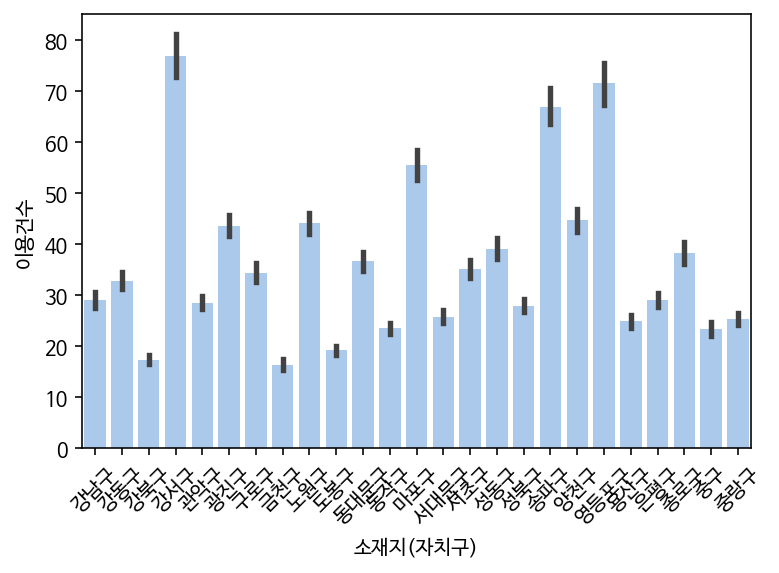

In [36]:
import seaborn as sns

sns.set_color_codes('pastel')

sns.barplot(
    data= df_1,
    x= "소재지(자치구)",
    y= "이용건수", 
    color='b'
)

plt.xticks(rotation = 45 )
plt.rcParams['font.family'] = 'NanumGothic'
plt.show()

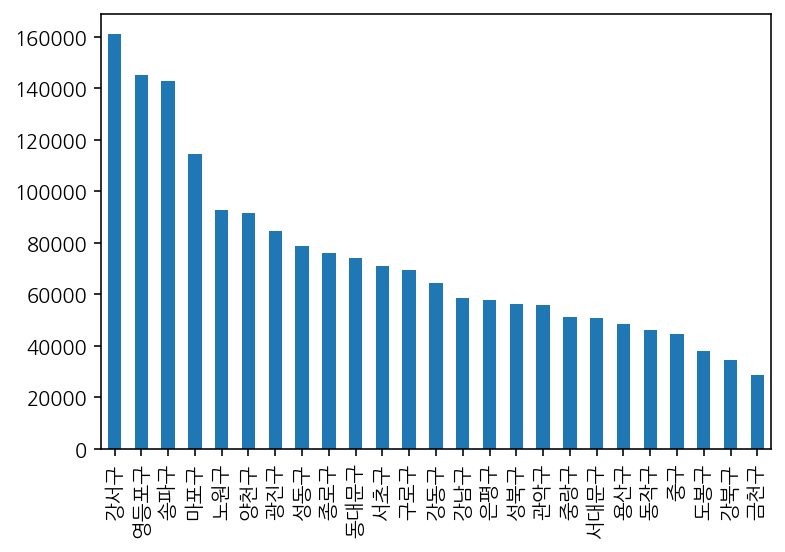

In [37]:
g = df['소재지(자치구)'].value_counts().sort_values(ascending=False)
g.plot.bar()

In [38]:
real = ['강서구','영등포구','송파구']
df_real = df_1[df_1['소재지(자치구)'].isin(real)]
df_real.shape

(7075, 7)

In [39]:
df_real_onehot = pd.get_dummies(data = df_real, columns = ['대여구분코드','요일','소재지(자치구)'], prefix = ['대여구분코드','요일','소재지(자치구)'])
print(df_real_onehot.shape)
df_real_onehot.head()

(7075, 17)


,날짜,대여시간,서울시 추가 확진,이용건수,대여구분코드_단체권,대여구분코드_일일권,대여구분코드_정기권,요일_0,요일_1,요일_2,요일_3,요일_4,요일_5,요일_6,소재지(자치구)_강서구,소재지(자치구)_송파구,소재지(자치구)_영등포구
45,2021-03-01,0,92,13,0,1,0,1,0,0,0,0,0,0,1,0,0
46,2021-03-01,0,92,40,0,0,1,1,0,0,0,0,0,0,1,0,0
47,2021-03-01,1,92,4,1,0,0,1,0,0,0,0,0,0,1,0,0
48,2021-03-01,1,92,9,0,1,0,1,0,0,0,0,0,0,1,0,0
49,2021-03-01,1,92,14,0,0,1,1,0,0,0,0,0,0,1,0,0


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression


train, test = train_test_split(df_real_onehot, test_size=0.2, random_state=2)
train.shape,test.shape

((5660, 17), (1415, 17))

In [41]:
train, val = train_test_split(train, train_size=0.80, test_size=0.20, random_state=2)
train.shape, val.shape,test.shape

((4528, 17), (1132, 17), (1415, 17))

In [48]:
target = '이용건수'
features = df_real_onehot.drop(columns=[target,'날짜']).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [49]:
baseline = df_1['이용건수'].mean()
y_base = [baseline] * len(y_train)

mae = mean_absolute_error(y_train, y_base)
print(f' MAE : {mae:.2f}')

 MAE : 61.80


In [50]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
mae = mean_absolute_error(y_train, y_pred_train)

y_pred_val = lr.predict(X_val)
mae = mean_absolute_error(y_val, y_pred_val)

print("train acc: ",lr.score(X_train,y_train))
print("test acc: ",lr.score(X_val,y_val))

train acc:  0.37136681015164164
test acc:  0.3835782811673959
